<a href="https://colab.research.google.com/github/slee987/slee987/blob/main/Cin_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fiona
!pip install geopandas
!pip install pygeos
!pip install pyproj
!pip install rtree
!pip install pysal
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 865.8 kB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [ ]:
import fiona
import geopandas as gpd 
import pygeos
import rtree

from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np
from scipy.spatial import KDTree 
import pandas as pd
# import geopandas as gpdy

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-b44f498e3ef9>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  impo

In [ ]:
#Census Tract
file1="/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Austin/tracts/Tracts.shp"
#Nextdoor2021
file2= "/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/GEOs_Cincinnati_1.json"
#Census block pop
# file3="/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Austin/tracts/travis_county_2020.csv"
#Nextdoor2020
#file2 ="/content/drive/MyDrive/GEOJSON_citylevel/Dataset/GEOJSON/GEOs_Atlanta_modified.json"
#Census Block2020
file_cb_shp= "/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/cin_20_block/tl_2020_39_tabblock10.shp"
#Census Block2010
cb_2010_shp= '/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/cin2010blockshp/tl_2010_39061_tabblock10.shp'
#City Limit
file4= "/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Cincinnati_City_Boundary/Cincinnati_City_Boundary.shp"
#Atlanta Crime2020
# file5= "/content/drive/MyDrive/GEOJSON_citylevel/Dataset/GA/Atl_2020.csv"
#file5="/content/drive/MyDrive/GEOJSON_citylevel/02042022/postcrime_timediff.csv"

#Census block pop 2010
bl10='/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Population/Cincinnati2010.csv'
#Census block pop 2020
bl20='/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Population/Cincinnati2020.csv'

In [ ]:
bl10=pd.read_csv(bl10)
bl10.head()

,GEO_ID,NAME,total,black
0,1000000US390610002001000,"Block 1000, Block Group 1, Census Tract 2, Ham...",199,196
1,1000000US390610002001001,"Block 1001, Block Group 1, Census Tract 2, Ham...",137,136
2,1000000US390610002001002,"Block 1002, Block Group 1, Census Tract 2, Ham...",0,0
3,1000000US390610002001003,"Block 1003, Block Group 1, Census Tract 2, Ham...",325,296
4,1000000US390610002001004,"Block 1004, Block Group 1, Census Tract 2, Ham...",0,0


In [ ]:
bl20=pd.read_csv(bl20)
bl20.head()

,GEO_ID,NAME,total,black
0,1000000US390610002001000,"Block 1000, Block Group 1, Census Tract 2, Ham...",314,287
1,1000000US390610002001001,"Block 1001, Block Group 1, Census Tract 2, Ham...",0,0
2,1000000US390610002001002,"Block 1002, Block Group 1, Census Tract 2, Ham...",0,0
3,1000000US390610002001003,"Block 1003, Block Group 1, Census Tract 2, Ham...",0,0
4,1000000US390610002001004,"Block 1004, Block Group 1, Census Tract 2, Ham...",0,0


In [ ]:
bl10['SCTBKEY']=bl10['GEO_ID'].str.strip().str[9:]
bl10


,GEO_ID,NAME,total,black,SCTBKEY
0,1000000US390610002001000,"Block 1000, Block Group 1, Census Tract 2, Ham...",199,196,390610002001000
1,1000000US390610002001001,"Block 1001, Block Group 1, Census Tract 2, Ham...",137,136,390610002001001
2,1000000US390610002001002,"Block 1002, Block Group 1, Census Tract 2, Ham...",0,0,390610002001002
3,1000000US390610002001003,"Block 1003, Block Group 1, Census Tract 2, Ham...",325,296,390610002001003
4,1000000US390610002001004,"Block 1004, Block Group 1, Census Tract 2, Ham...",0,0,390610002001004
...,...,...,...,...,...
10803,1000000US390610274004018,"Block 4018, Block Group 4, Census Tract 274, H...",16,3,390610274004018
10804,1000000US390610274004019,"Block 4019, Block Group 4, Census Tract 274, H...",67,13,390610274004019
10805,1000000US390610274004020,"Block 4020, Block Group 4, Census Tract 274, H...",0,0,390610274004020
10806,1000000US390610274004021,"Block 4021, Block Group 4, Census Tract 274, H...",36,14,390610274004021


In [ ]:
bl20['SCTBKEY']=bl20['GEO_ID'].str.strip().str[9:]
bl20

,GEO_ID,NAME,total,black,SCTBKEY
0,1000000US390610002001000,"Block 1000, Block Group 1, Census Tract 2, Ham...",314,287,390610002001000
1,1000000US390610002001001,"Block 1001, Block Group 1, Census Tract 2, Ham...",0,0,390610002001001
2,1000000US390610002001002,"Block 1002, Block Group 1, Census Tract 2, Ham...",0,0,390610002001002
3,1000000US390610002001003,"Block 1003, Block Group 1, Census Tract 2, Ham...",0,0,390610002001003
4,1000000US390610002001004,"Block 1004, Block Group 1, Census Tract 2, Ham...",0,0,390610002001004
...,...,...,...,...,...
9316,1000000US390610277004012,"Block 4012, Block Group 4, Census Tract 277, H...",31,5,390610277004012
9317,1000000US390610277004013,"Block 4013, Block Group 4, Census Tract 277, H...",29,5,390610277004013
9318,1000000US390610277004014,"Block 4014, Block Group 4, Census Tract 277, H...",16,3,390610277004014
9319,1000000US390610277004015,"Block 4015, Block Group 4, Census Tract 277, H...",27,1,390610277004015


In [ ]:
nd=gpd.read_file(file2)
nd.head()


,centroid,fill,fill-opacity,hood_id,hood_name,stroke,geometry
0,"{'x': -84.38821505573205, 'y': 39.06593185762304}",#6DA300,0.45,332158,4 Mile Rd,#6DA300,"MULTIPOLYGON (((-84.39503 39.07038, -84.39503 ..."
1,"{'x': -84.56499605683376, 'y': 39.24113497185743}",#6DA300,0.45,345671,Adams Creek,#6DA300,"MULTIPOLYGON (((-84.56962 39.24153, -84.56962 ..."
2,"{'x': -84.55924594764554, 'y': 39.24378365245119}",#6DA300,0.45,219748,Adams Ridge,#6DA300,"MULTIPOLYGON (((-84.56240 39.24325, -84.56240 ..."
3,"{'x': -84.6863313262007, 'y': 39.14799821299037}",#6DA300,0.45,219008,Algus Lane,#6DA300,"MULTIPOLYGON (((-84.68304 39.15290, -84.68105 ..."
4,"{'x': -84.42772287217224, 'y': 39.20354296167652}",#6DA300,0.45,185142,Amberley Village,#6DA300,"MULTIPOLYGON (((-84.45291 39.19405, -84.45245 ..."


In [ ]:
bl_shp= gpd.read_file(file_cb_shp)
bl_shp
# bl_shp=bl_shp[(bl_shp['COUNTYFP10']=='061')]

bl_shp=bl_shp.to_crs(4326)
bl_shp

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,39,039,958900,4081,390399589004081,Block 4081,G5040,R,None,None,S,0,100858,+41.2102062,-084.4505550,"POLYGON ((-84.45507 41.20958, -84.45498 41.209..."
1,39,123,050800,1014,391230508001014,Block 1014,G5040,R,None,None,S,4862866,334646,+41.5723941,-083.0572389,"POLYGON ((-83.07726 41.56923, -83.07724 41.572..."
2,39,003,010800,5047,390030108005047,Block 5047,G5040,U,49852,U,S,0,4079,+40.7443241,-084.1810406,"POLYGON ((-84.18259 40.74637, -84.18229 40.746..."
3,39,149,971400,2112,391499714002112,Block 2112,G5040,R,None,None,S,1391420,4714,+40.3807984,-084.0489479,"POLYGON ((-84.05679 40.38485, -84.05501 40.385..."
4,39,171,950100,4109,391719501004109,Block 4109,G5040,R,None,None,S,2430831,14518,+41.6290845,-084.4851380,"POLYGON ((-84.49568 41.62339, -84.49567 41.623..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365339,39,049,001700,1000,390490017001000,Block 1000,G5040,U,19234,U,S,13030,0,+39.9950355,-083.0022093,"POLYGON ((-83.00290 39.99555, -83.00146 39.995..."
365340,39,153,506100,2005,391535061002005,Block 2005,G5040,U,00766,U,S,34914,0,+41.1077252,-081.5790720,"POLYGON ((-81.58036 41.10833, -81.58033 41.108..."
365341,39,079,957400,3037,390799574003037,Block 3037,G5040,R,None,None,S,307901,0,+39.0309182,-082.7411178,"POLYGON ((-82.74576 39.03055, -82.74530 39.032..."
365342,39,091,004200,2033,390910042002033,Block 2033,G5040,U,76879,C,S,7507,0,+40.4650816,-083.8971758,"POLYGON ((-83.89752 40.46566, -83.89684 40.465..."


In [ ]:
bl10_shp= gpd.read_file(cb_2010_shp)
bl10_shp.head()
# bl10_shp=bl10_shp[(bl10_shp['CNTY']=='453')]

bl10_shp=bl10_shp.to_crs(4326)
bl10_shp

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,39,061,025401,2021,390610254012021,Block 2021,G5040,U,16885,U,S,17252,0,+39.1563419,-084.4585185,"POLYGON ((-84.45964 39.15560, -84.45956 39.155..."
1,39,061,025600,4000,390610256004000,Block 4000,G5040,U,16885,U,S,18325,0,+39.1548000,-084.4613860,"POLYGON ((-84.46031 39.15476, -84.46073 39.154..."
2,39,061,025600,2000,390610256002000,Block 2000,G5040,U,16885,U,S,30748,0,+39.1540179,-084.4592754,"POLYGON ((-84.45792 39.15333, -84.46115 39.153..."
3,39,061,025401,2000,390610254012000,Block 2000,G5040,U,16885,U,S,60203,0,+39.1607409,-084.4482014,"POLYGON ((-84.44932 39.16122, -84.44869 39.162..."
4,39,061,025600,1000,390610256001000,Block 1000,G5040,U,16885,U,S,23321,0,+39.1537362,-084.4567539,"POLYGON ((-84.45792 39.15333, -84.45772 39.154..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,39,061,021801,3007,390610218013007,Block 3007,G5040,U,16885,U,S,14281,0,+39.2172717,-084.5562552,"POLYGON ((-84.55597 39.21656, -84.55687 39.216..."
10804,39,061,021801,1008,390610218011008,Block 1008,G5040,U,16885,U,S,26686,0,+39.2176450,-084.5374380,"POLYGON ((-84.53685 39.21658, -84.53823 39.216..."
10805,39,061,021801,4001,390610218014001,Block 4001,G5040,U,16885,U,S,17209,0,+39.2257986,-084.5545642,"POLYGON ((-84.55344 39.22615, -84.55350 39.225..."
10806,39,061,021801,4004,390610218014004,Block 4004,G5040,U,16885,U,S,49827,0,+39.2238171,-084.5536699,"POLYGON ((-84.55196 39.22299, -84.55370 39.223..."


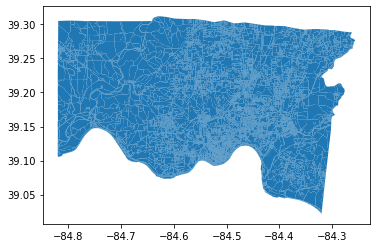

In [ ]:
bl_shp.plot()

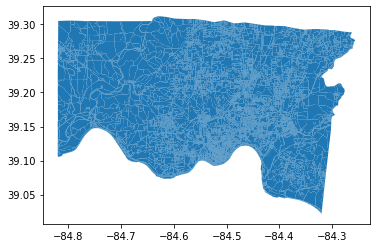

In [ ]:
bl10_shp.plot()

In [ ]:
city=gpd.read_file(file4)
city=city.to_crs(4326)
city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


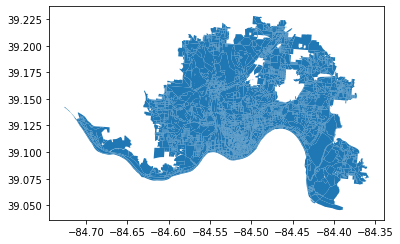

In [ ]:
cb_map=gpd.sjoin(bl_shp,city,op='intersects')
cb_map=cb_map.drop(columns='index_right')
cb_map.plot()

In [ ]:
cb10_map=gpd.sjoin(bl10_shp,city,op='intersects')
cb10_map=cb10_map.drop(columns='index_right')
cb10_map.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,...,SQMI,SE_ANNO_CA,GLOBALID,CREATED_US,CREATED_DA,LAST_EDITE,LAST_EDI_1,CAGISCinc_,SHAPEAREA,SHAPELEN
9,39,061,025402,2005,390610254022005,Block 2005,G5040,U,16885,U,...,79.733,None,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},cagis,2015-02-24,CPD_JWEAVER,2021-03-04,None,0,0
21,39,061,010300,2022,390610103002022,Block 2022,G5040,U,16885,U,...,79.733,None,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},cagis,2015-02-24,CPD_JWEAVER,2021-03-04,None,0,0
22,39,061,026700,1040,390610267001040,Block 1040,G5040,U,16885,U,...,79.733,None,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},cagis,2015-02-24,CPD_JWEAVER,2021-03-04,None,0,0
23,39,061,026700,1041,390610267001041,Block 1041,G5040,U,16885,U,...,79.733,None,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},cagis,2015-02-24,CPD_JWEAVER,2021-03-04,None,0,0
24,39,061,026700,1045,390610267001045,Block 1045,G5040,U,16885,U,...,79.733,None,{3028B9D5-0B01-4F04-B4F9-22DBEA1F3C0C},cagis,2015-02-24,CPD_JWEAVER,2021-03-04,None,0,0


In [ ]:
# cb_map.to_csv('/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Cin_pop/ci_map_test.csv')
# bl20.to_csv('/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Cin_pop/bl_test.csv')

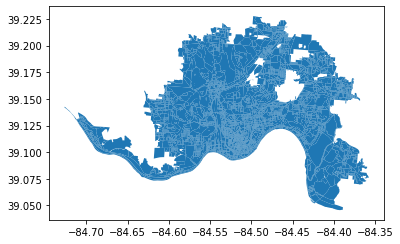

In [ ]:
cb_map.plot()

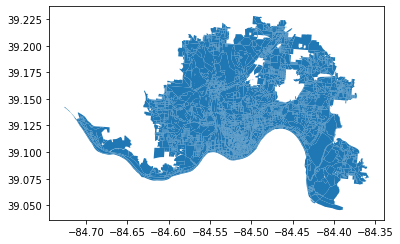

In [ ]:
cb10_map.plot()

In [ ]:
bl10.head()

,GEO_ID,NAME,total,black,SCTBKEY
0,1000000US390610002001000,"Block 1000, Block Group 1, Census Tract 2, Ham...",199,196,390610002001000
1,1000000US390610002001001,"Block 1001, Block Group 1, Census Tract 2, Ham...",137,136,390610002001001
2,1000000US390610002001002,"Block 1002, Block Group 1, Census Tract 2, Ham...",0,0,390610002001002
3,1000000US390610002001003,"Block 1003, Block Group 1, Census Tract 2, Ham...",325,296,390610002001003
4,1000000US390610002001004,"Block 1004, Block Group 1, Census Tract 2, Ham...",0,0,390610002001004


In [ ]:
cb10_map=cb10_map.rename(columns={'GEOID10':'SCTBKEY'})
cb_map=cb_map.rename(columns={'GEOID10':'SCTBKEY'})

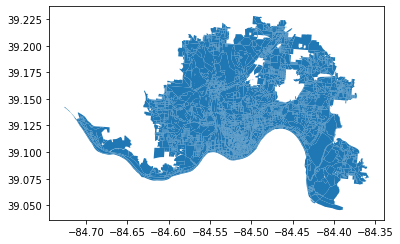

In [ ]:
ci_pop10=pd.merge(cb10_map,bl10, on='SCTBKEY')
ci_pop10.plot()

In [ ]:
ci_pop10['Shape_area']=ci_pop10.geometry.to_crs(3329).area

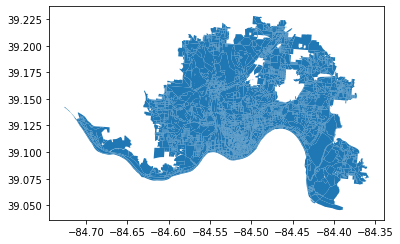

In [ ]:
ci_pop=pd.merge(cb_map,bl20, on='SCTBKEY',how='outer')
ci_pop.plot()

In [ ]:
ci_pop['Shape_area']=ci_pop.geometry.to_crs(3329).area

In [ ]:
nd['area']=nd.to_crs(3329).area
nd.head()

,centroid,fill,fill-opacity,hood_id,hood_name,stroke,geometry,area
0,"{'x': -84.38821505573205, 'y': 39.06593185762304}",#6DA300,0.45,332158,4 Mile Rd,#6DA300,"MULTIPOLYGON (((-84.39503 39.07038, -84.39503 ...",2.058216e+06
1,"{'x': -84.56499605683376, 'y': 39.24113497185743}",#6DA300,0.45,345671,Adams Creek,#6DA300,"MULTIPOLYGON (((-84.56962 39.24153, -84.56962 ...",2.071095e+05
2,"{'x': -84.55924594764554, 'y': 39.24378365245119}",#6DA300,0.45,219748,Adams Ridge,#6DA300,"MULTIPOLYGON (((-84.56240 39.24325, -84.56240 ...",3.002737e+05
3,"{'x': -84.6863313262007, 'y': 39.14799821299037}",#6DA300,0.45,219008,Algus Lane,#6DA300,"MULTIPOLYGON (((-84.68304 39.15290, -84.68105 ...",4.667805e+06
4,"{'x': -84.42772287217224, 'y': 39.20354296167652}",#6DA300,0.45,185142,Amberley Village,#6DA300,"MULTIPOLYGON (((-84.45291 39.19405, -84.45245 ...",1.801151e+07


In [ ]:
nd=nd.to_crs(4326)

In [ ]:
ci_pop_nd10=gpd.sjoin(nd,ci_pop10, predicate='intersects')
ci_pop_nd20=gpd.sjoin(nd,ci_pop, predicate='intersects')

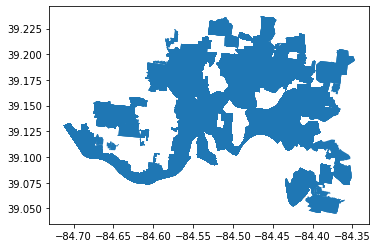

In [ ]:
ci_pop_nd20.plot()

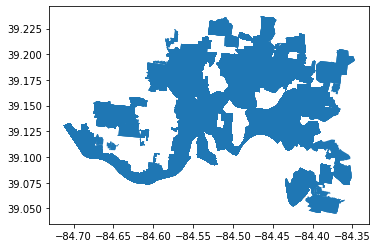

In [ ]:
ci_pop_nd10.plot()

In [ ]:
ci_pop_nd20['timeind'] =1
ci_pop_nd10['timeind'] =0


/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 21 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 21 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


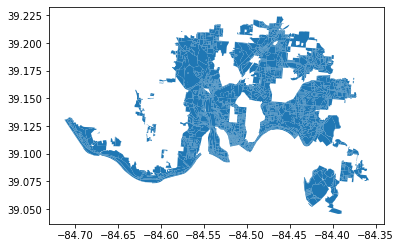

In [ ]:
tmp10=ci_pop10.overlay(nd,how='intersection')#.to_crs(3392).area
tmp10['o_area']=ci_pop10.overlay(nd,how='intersection').to_crs(3392).area
tmp10.plot()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 21 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 21 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


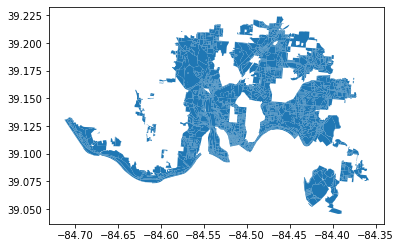

In [ ]:
tmp20=ci_pop.overlay(nd,how='intersection')
tmp20['o_area']=ci_pop.overlay(nd,how='intersection').to_crs(3392).area
tmp20.plot()

In [ ]:
tmp10['area_ratio']=tmp10['o_area']/tmp10['area']
tmp20['area_ratio']=tmp20['o_area']/tmp20['area']

In [ ]:
tmp10['onerace_persize']=tmp10['total']*tmp10['area_ratio']
tmp10['onerace_persize']=tmp10['onerace_persize'].apply(np.floor)

tmp10['bl_persize']=tmp10['black']*tmp10['area_ratio']
tmp10['bl_persize']=tmp10['bl_persize'].apply(np.floor)

tmp20['onerace_persize']=tmp20['total']*tmp20['area_ratio']
tmp20['onerace_persize']=tmp20['onerace_persize'].apply(np.floor)

tmp20['bl_persize']=tmp20['black']*tmp20['area_ratio']
tmp20['bl_persize']=tmp20['bl_persize'].apply(np.floor)
#tmp10['black_rat']

In [ ]:
nd.head()

,centroid,fill,fill-opacity,hood_id,hood_name,stroke,geometry,area
0,"{'x': -84.38821505573205, 'y': 39.06593185762304}",#6DA300,0.45,332158,4 Mile Rd,#6DA300,"MULTIPOLYGON (((-84.39503 39.07038, -84.39503 ...",2.058216e+06
1,"{'x': -84.56499605683376, 'y': 39.24113497185743}",#6DA300,0.45,345671,Adams Creek,#6DA300,"MULTIPOLYGON (((-84.56962 39.24153, -84.56962 ...",2.071095e+05
2,"{'x': -84.55924594764554, 'y': 39.24378365245119}",#6DA300,0.45,219748,Adams Ridge,#6DA300,"MULTIPOLYGON (((-84.56240 39.24325, -84.56240 ...",3.002737e+05
3,"{'x': -84.6863313262007, 'y': 39.14799821299037}",#6DA300,0.45,219008,Algus Lane,#6DA300,"MULTIPOLYGON (((-84.68304 39.15290, -84.68105 ...",4.667805e+06
4,"{'x': -84.42772287217224, 'y': 39.20354296167652}",#6DA300,0.45,185142,Amberley Village,#6DA300,"MULTIPOLYGON (((-84.45291 39.19405, -84.45245 ...",1.801151e+07


In [ ]:
tmp10.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'SCTBKEY',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYP10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'OBJECTID',
       'PERIMETER', 'BND_NAME', 'SQMI', 'SE_ANNO_CA', 'GLOBALID', 'CREATED_US',
       'CREATED_DA', 'LAST_EDITE', 'LAST_EDI_1', 'CAGISCinc_', 'SHAPEAREA',
       'SHAPELEN', 'GEO_ID', 'NAME', 'total', 'black', 'centroid', 'fill',
       'fill-opacity', 'hood_id', 'hood_name', 'stroke', 'area', 'geometry',
       'o_area', 'area_ratio', 'onerace_persize', 'bl_persize'],
      dtype='object')

In [ ]:
tmp10['black_ratio']=''
# tmp10['onerace_ratio']=''
tmp10_dt=tmp10.groupby('hood_id',as_index=False).agg({'onerace_persize':'sum','bl_persize':'sum'})
tmp10_dt['bl_ratio']=tmp10_dt['bl_persize']/tmp10_dt['onerace_persize']
tmp10_dt['timeind']=0
tmp10_dt

,hood_id,onerace_persize,bl_persize,bl_ratio,timeind
0,5929,84.0,0.0,0.000000,0
1,5934,91.0,7.0,0.076923,0
2,5935,546.0,471.0,0.862637,0
3,5938,78.0,17.0,0.217949,0
4,5940,73.0,42.0,0.575342,0
...,...,...,...,...,...
90,410150,39.0,27.0,0.692308,0
91,411852,0.0,0.0,NaN,0
92,411863,25.0,0.0,0.000000,0
93,418004,133.0,12.0,0.090226,0


In [ ]:
tmp20['black_ratio']=''
# tmp10['onerace_ratio']=''
tmp20_dt=tmp20.groupby('hood_id',as_index=False).agg({'onerace_persize':'sum','bl_persize':'sum'})
tmp20_dt['bl_ratio']=tmp20_dt['bl_persize']/tmp20_dt['onerace_persize']
tmp20_dt['timeind']=1

In [ ]:
tmp10_dt.to_csv('/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Cin_pop/ci_2010_ratio.csv')
tmp20_dt.to_csv('/content/drive/MyDrive/GEOJSON_citylevel/Dataset/Cincinatti/Cin_pop/ci_2020_ratio.csv')